<a href="https://colab.research.google.com/github/dmahoner/Test-2/blob/main/Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Replace '/path/to/your/file.xlsx' with the actual file path
file_path = '/content/Test2_dataset.xlsx'

# Load the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame

print(df.head())

             Catalyst  Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  \
0         Ni−SiO2‑550                  0.15                   650        10.0   
1         Ni−SiO2‑750                  0.15                   650        10.0   
2   Ni/Sn0.2−SiO2‑550                  0.15                   650        10.0   
3   Ni/Sn0.2−SiO2‑750                  0.15                   650        10.0   
4  Ni/Sn0.05−SiO2‑550                  0.15                   650        10.0   

   Reaction Time  Pore Size  Pore Volume  Surface Area  \
0            0.5        4.7         0.58         476.0   
1            0.5        4.7         0.58         476.0   
2            0.5        5.2         0.58         455.0   
3            0.5        5.2         0.58         455.0   
4            0.5        4.8         0.82         599.0   

   H2-TPR Peak Temperature  Ni Particle Size  Ni Dispersion  \
0                    640.0               2.9            NaN   
1                    640.0            

Check for missing values

In [2]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the results
print("Missing values in each column:")
print(missing_values)

# Replace missing values with the mean value (for numeric columns only)
for col in df.select_dtypes(include=['int64', 'float64']): # Iterate over numeric columns only
    df[col].fillna(df[col].mean(), inplace=True)

Missing values in each column:
Catalyst                         0
Ratio of CH4 in Feed             0
Reaction Temperature             0
Ni Loading                       0
Reaction Time                    0
Pore Size                        0
Pore Volume                      0
Surface Area                     0
H2-TPR Peak Temperature          0
Ni Particle Size                 0
Ni Dispersion                 1056
Modifier Electronegativity       0
GHSV                             0
CH4 Conversion                  49
CO2 Conversion                  77
Syngas_Ratio                    76
dtype: int64


Fix missing values error

In [14]:
# prompt: write code to remove rows of missing data

# Remove rows with any missing values
df.dropna(inplace= False)

# Display the DataFrame after removing rows with missing values
print(df.head())

            Catalyst  Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  \
0        Ni−SiO2‑550                  0.15                   650        10.0   
1        Ni−SiO2‑750                  0.15                   650        10.0   
2  Ni/Sn0.2−SiO2‑550                  0.15                   650        10.0   
5        Ni/(-Al2O3)                  0.15                   800         5.0   
6   Ni/(Al2O3-Crush)                  0.15                   800         5.0   

   Reaction Time  Pore Size  Pore Volume  Surface Area  \
0          0.500        4.7         0.58         476.0   
1          0.500        4.7         0.58         476.0   
2          0.500        5.2         0.58         455.0   
5          4.167       20.9         0.62         128.7   
6          4.167       11.1         0.23          80.7   

   H2-TPR Peak Temperature  Ni Particle Size  Ni Dispersion  \
0                    640.0               2.9       9.886117   
1                    640.0               4.6

Identify outliers

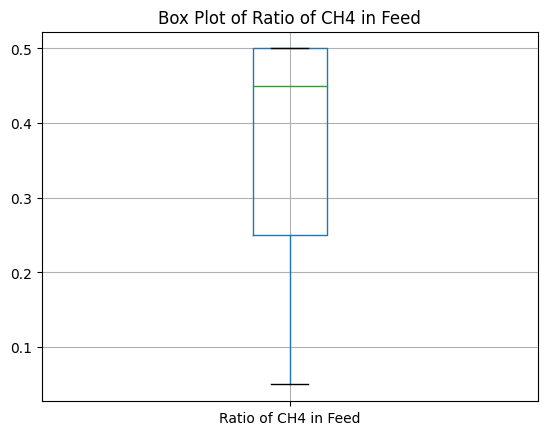

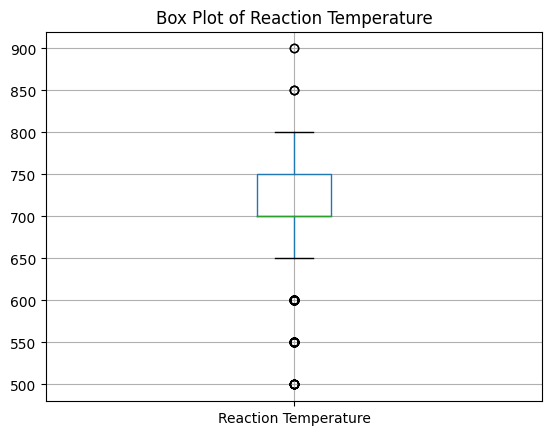

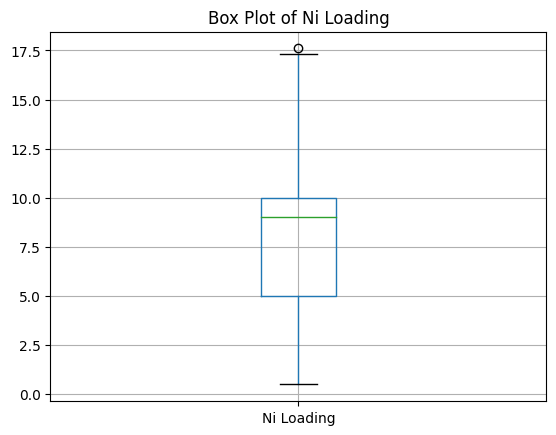

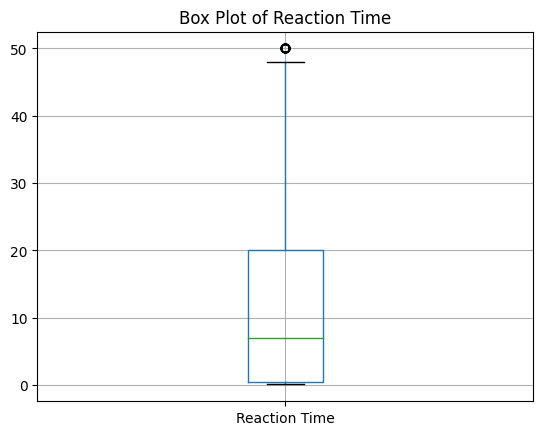

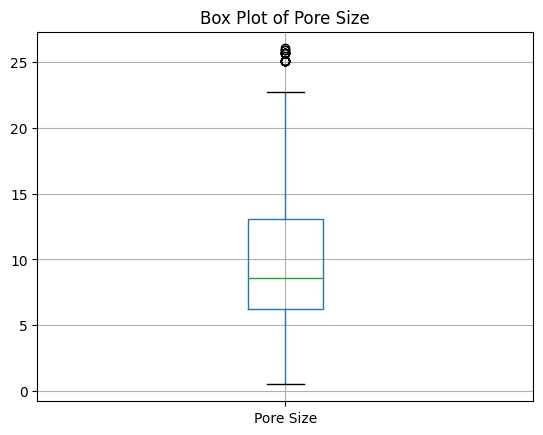

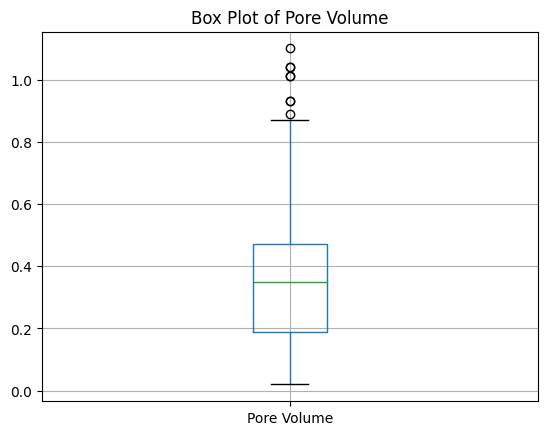

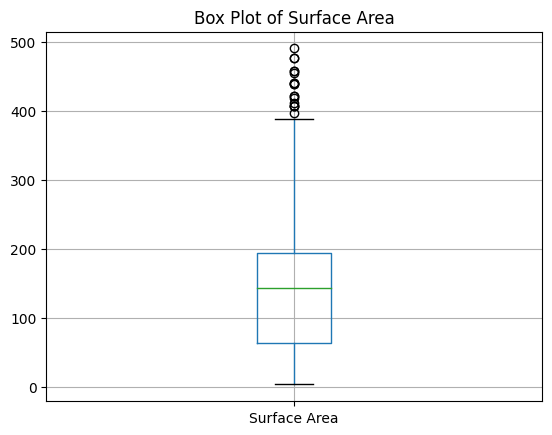

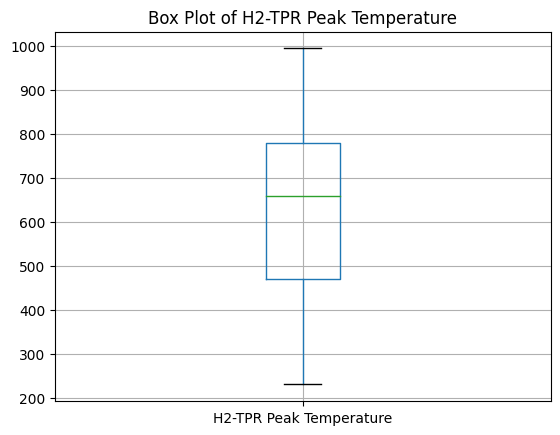

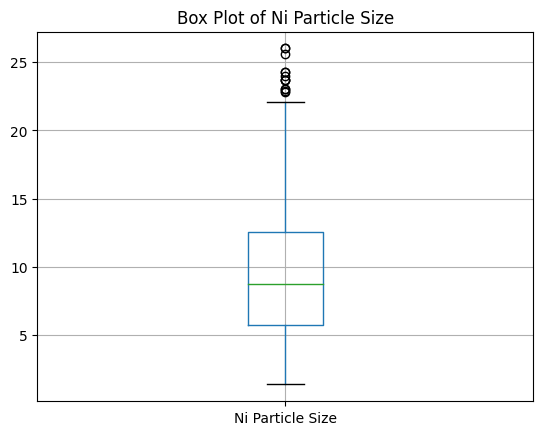

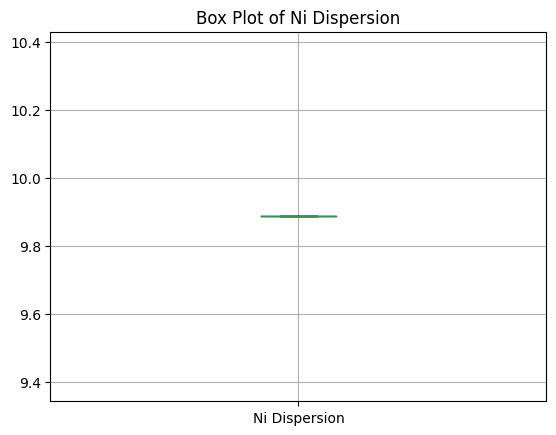

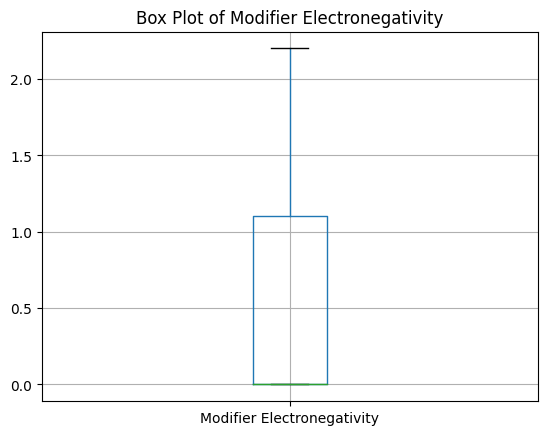

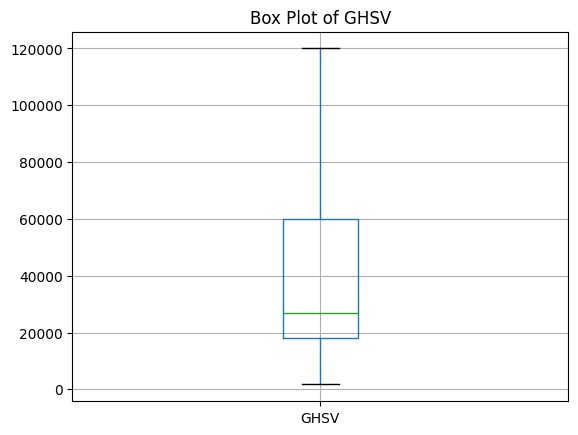

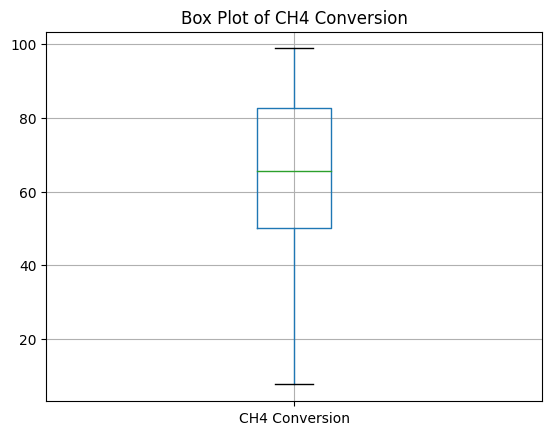

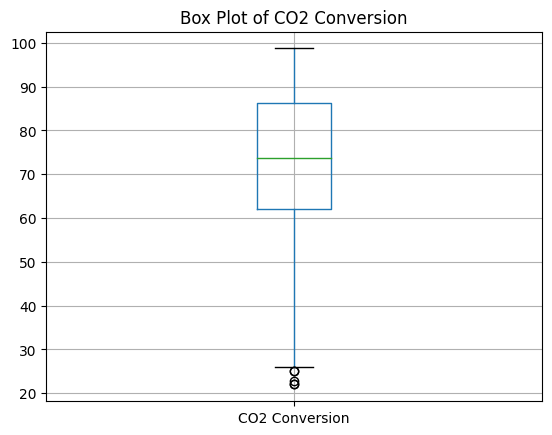

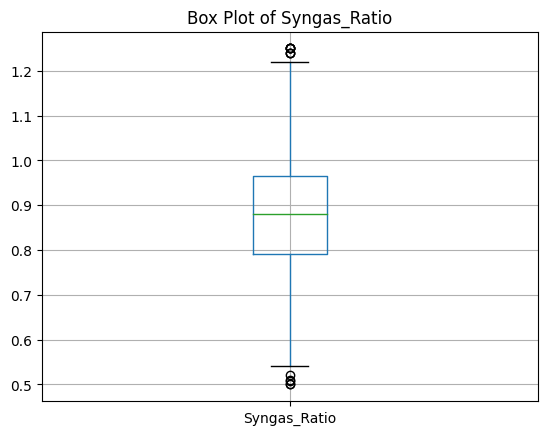

In [15]:
# prompt: perform a visual analysis to spot outliers in columns

import matplotlib.pyplot as plt

# Select numerical columns for outlier analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create box plots to visualize outliers
for col in numeric_cols:
  plt.figure()
  df.boxplot(column=col)
  plt.title(f'Box Plot of {col}')
  plt.show()


Use Statistics to remove outliers that aren't within range

In [16]:
# prompt: write code to get rid of the outliers

# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to each numerical column
for col in numeric_cols:
  df = remove_outliers_iqr(df, col)

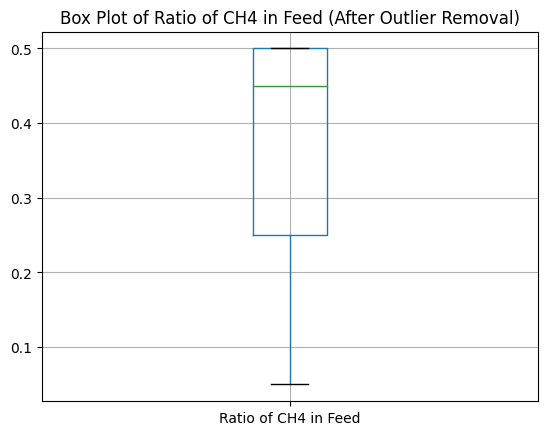

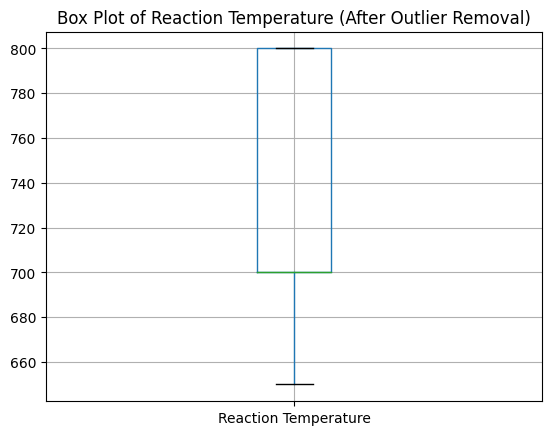

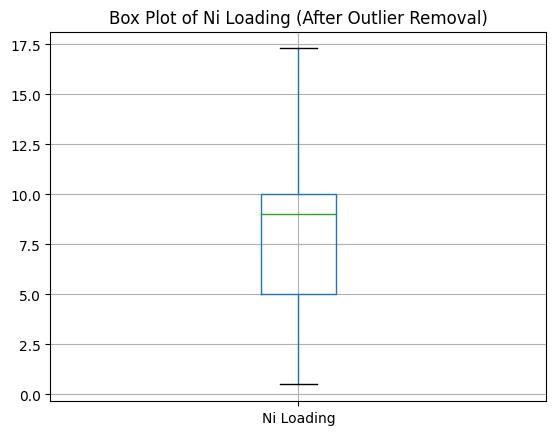

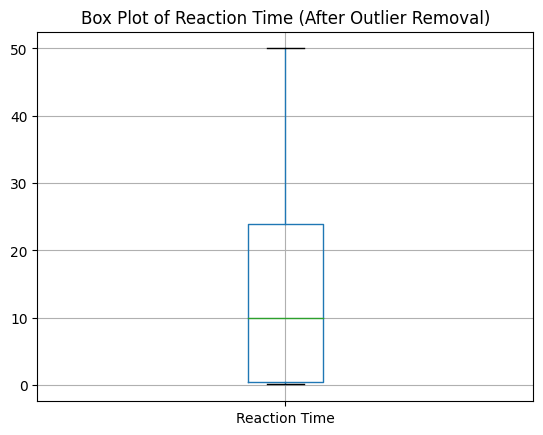

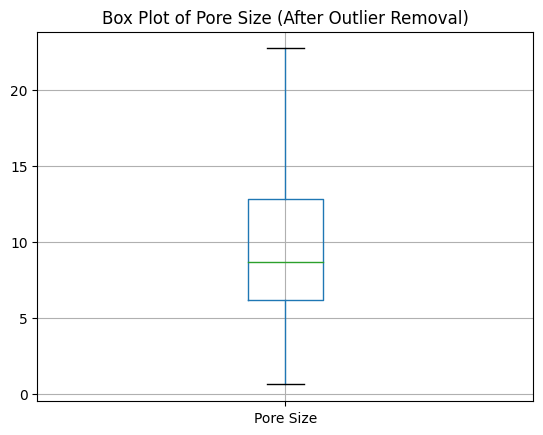

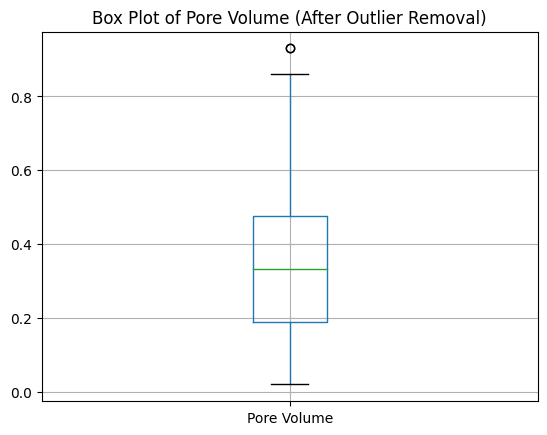

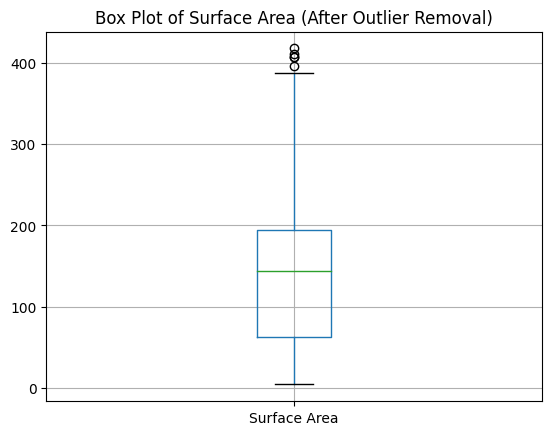

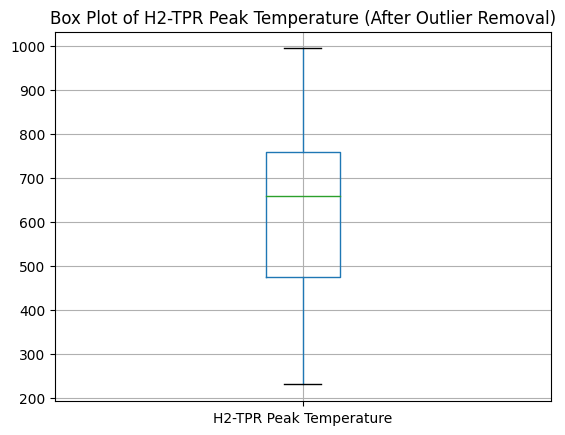

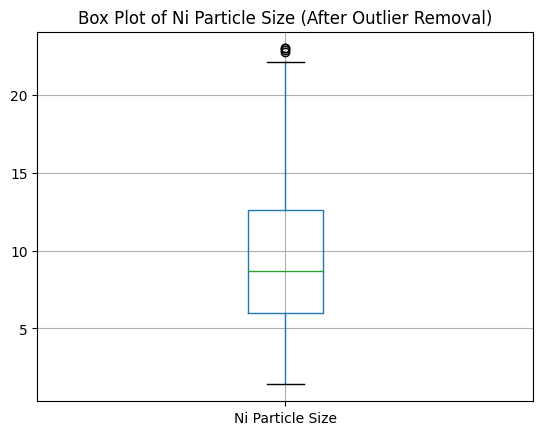

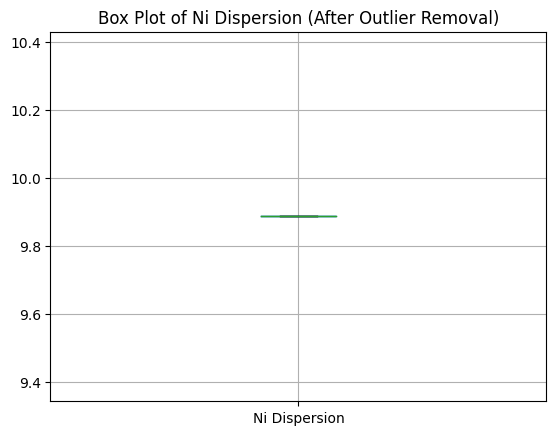

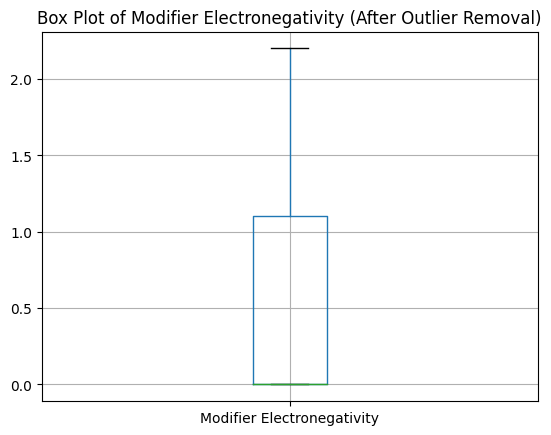

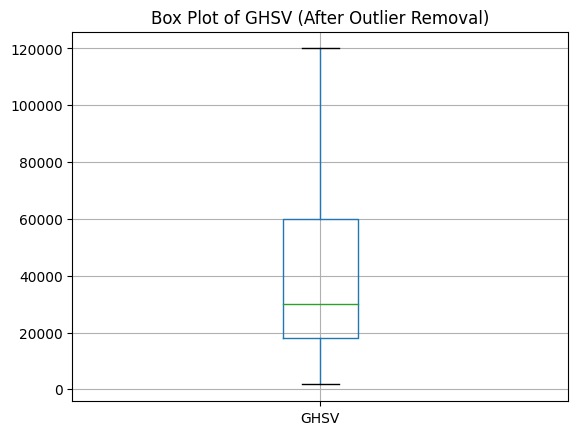

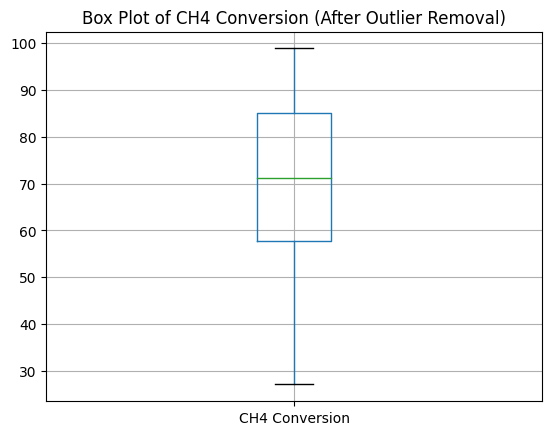

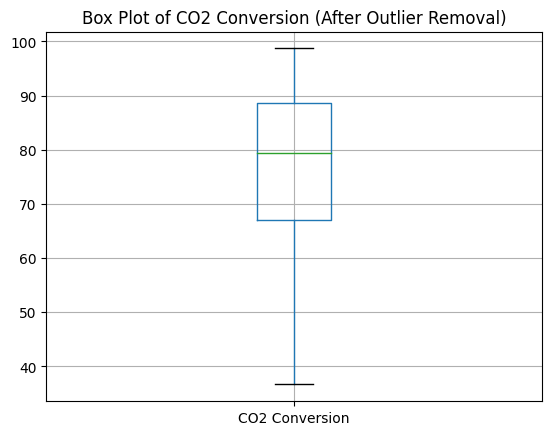

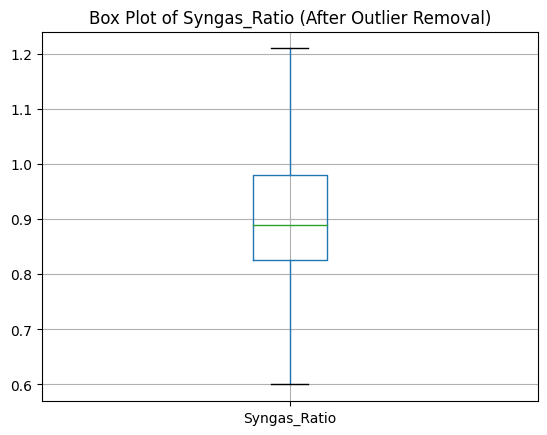

In [17]:
# prompt: plot new modified data with out outliers

import matplotlib.pyplot as plt
# Select numerical columns for outlier analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create box plots to visualize outliers after outlier removal
for col in numeric_cols:
  plt.figure()
  df.boxplot(column=col)
  plt.title(f'Box Plot of {col} (After Outlier Removal)')
  plt.show()

Encoding to prepare data

In [18]:
# prompt: write code to identify the data types present

# Get data types of each column
data_types = df.dtypes

# Print the data types
print("Data types of each column:")
print(data_types)


Data types of each column:
Catalyst                       object
Ratio of CH4 in Feed          float64
Reaction Temperature            int64
Ni Loading                    float64
Reaction Time                 float64
Pore Size                     float64
Pore Volume                   float64
Surface Area                  float64
H2-TPR Peak Temperature       float64
Ni Particle Size              float64
Ni Dispersion                 float64
Modifier Electronegativity    float64
GHSV                            int64
CH4 Conversion                float64
CO2 Conversion                float64
Syngas_Ratio                  float64
dtype: object


In [28]:
import pandas as pd

def one_hot_encode(file_path):
  """Converts categorical variables in an Excel file to numerical using one-hot encoding.

  Args:
    file_path: The path to the Excel file.

  Returns:
    The DataFrame with categorical variables one-hot encoded.
  """

  df = pd.read_excel(file_path)

  # Identify categorical columns (assuming object dtype)
  categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

  # Apply one-hot encoding
  df_encoded = pd.get_dummies(df, columns=categorical_cols)

  return df_encoded

file_path = '/content/Test2_dataset.xlsx'
df_encoded = one_hot_encode(file_path)

print(df_encoded)

      Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  Reaction Time  \
0                     0.15                   650       10.00            0.5   
1                     0.15                   650       10.00            0.5   
2                     0.15                   650       10.00            0.5   
3                     0.15                   650       10.00            0.5   
4                     0.15                   650       10.00            0.5   
...                    ...                   ...         ...            ...   
1709                  0.50                   750        4.24           72.0   
1710                  0.50                   700        5.00            3.0   
1711                  0.50                   700        5.00            3.0   
1712                  0.50                   700        5.00            3.0   
1713                  0.50                   700        5.00            3.0   

      Pore Size  Pore Volume  Surface Area  H2-TPR 

Summary Statistics

In [10]:
# prompt: calculate the mean, median, standard deviation, min, mas, IQR and display it in a table

# Calculate summary statistics
summary_stats = df.describe()

# Transpose the table for better readability
summary_stats = summary_stats.transpose()

# Calculate IQR
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']

# Display the table
print(summary_stats[['mean', '50%', 'std', 'min', 'max', 'IQR']])

                                    mean           50%           std  \
Ratio of CH4 in Feed            0.367823      0.450000  1.526873e-01   
Reaction Temperature          709.033281    700.000000  7.667195e+01   
Ni Loading                      8.238585      9.000000  3.530943e+00   
Reaction Time                  12.134447      7.000000  1.439511e+01   
Pore Size                       9.993228      8.570000  5.593452e+00   
Pore Volume                     0.351537      0.350000  2.138352e-01   
Surface Area                  150.529109    144.000000  1.026427e+02   
H2-TPR Peak Temperature       627.521601    658.000000  1.699150e+02   
Ni Particle Size                9.706957      8.720000  5.160622e+00   
Ni Dispersion                   9.886117      9.886117  1.777766e-15   
Modifier Electronegativity      0.429563      0.000000  6.696844e-01   
GHSV                        36233.914422  27000.000000  2.578043e+04   
CH4 Conversion                 64.128778     65.500000  2.163612

visualizing data relationships

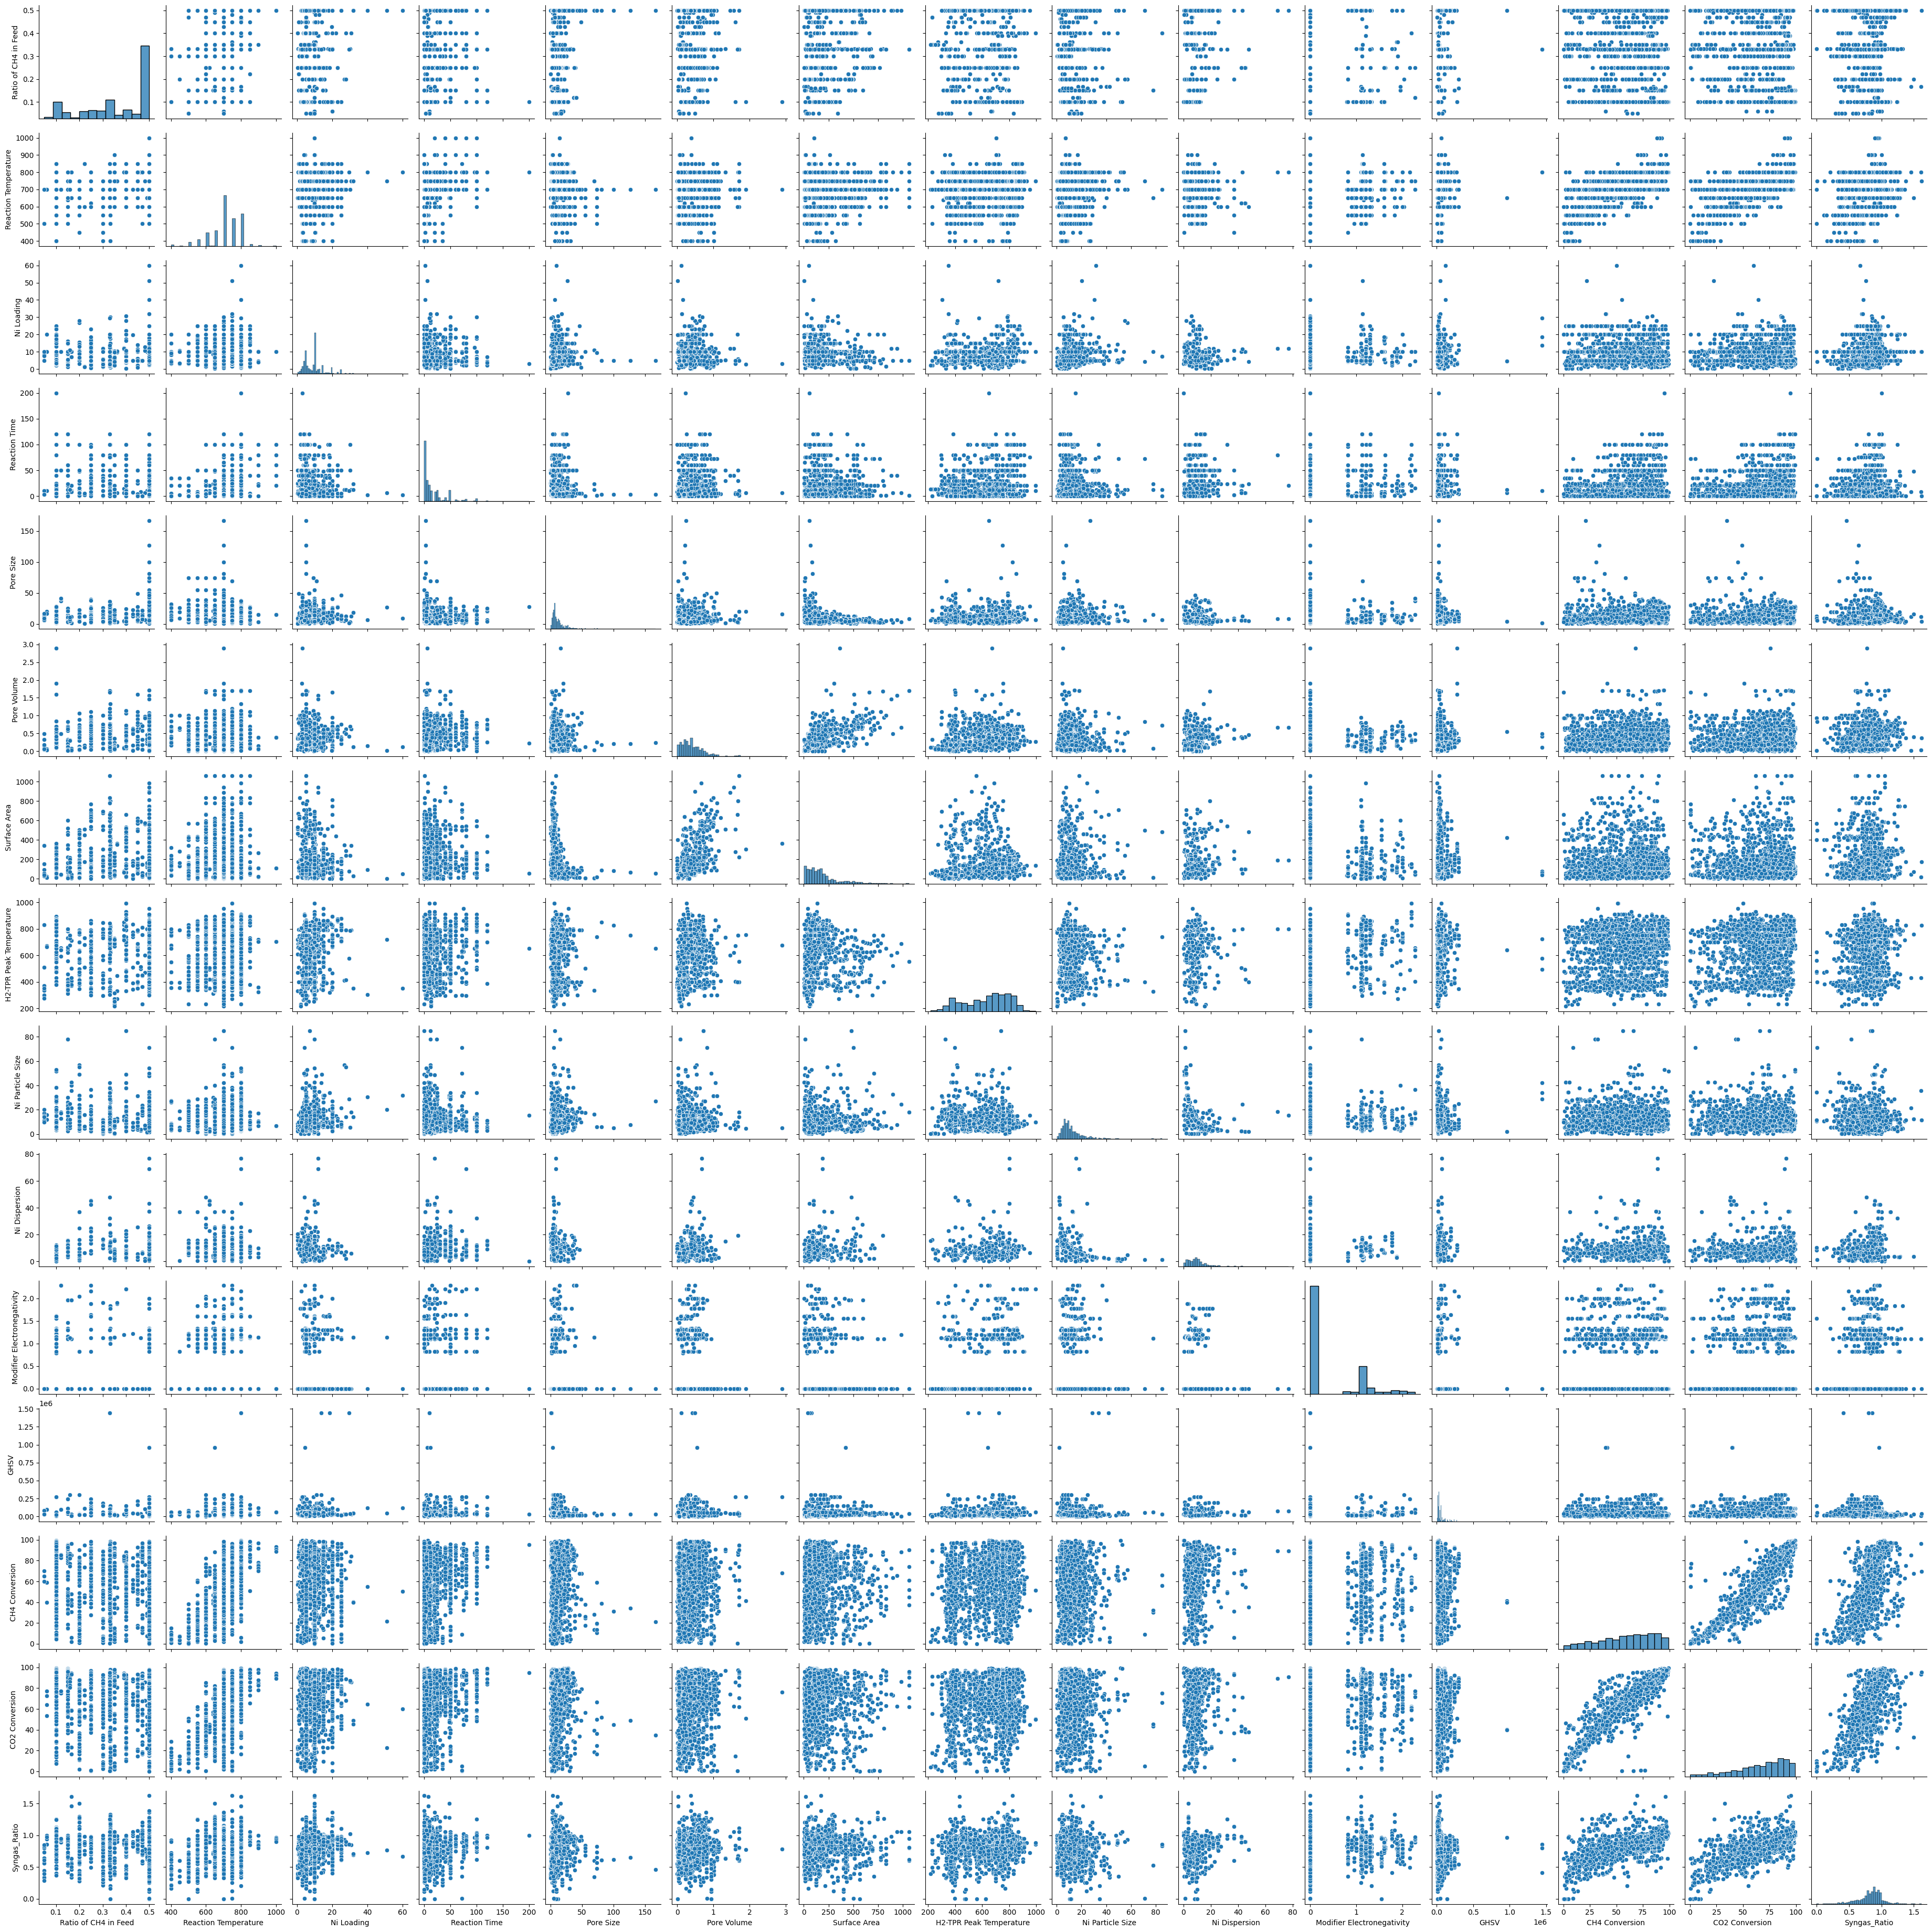

In [30]:
import pandas as pd
import seaborn as sns

def create_pair_plot(file_path):
  """Creates a pair plot for the specified Excel file.

  Args:
    file_path: The path to the Excel file.
  """

  df = pd.read_excel(file_path)

  sns.pairplot(df)
  plt.show()

file_path = '/content/Test2_dataset.xlsx'

create_pair_plot(file_path)

Correlations and a correlation heat map

       Ratio of CH4 in Feed  Reaction Temperature   Ni Loading  Reaction Time  \
count           1714.000000           1714.000000  1714.000000    1714.000000   
mean               0.369862            703.477246     9.337069      16.289964   
std                0.145389             86.778888     5.714180      22.749978   
min                0.050000            400.000000     0.300000       0.100000   
25%                0.250000            650.000000     5.000000       0.500000   
50%                0.400000            700.000000     9.670000       7.000000   
75%                0.500000            750.000000    10.220000      24.000000   
max                0.500000           1000.000000    60.000000     200.000000   

         Pore Size  Pore Volume  Surface Area  H2-TPR Peak Temperature  \
count  1714.000000  1714.000000   1714.000000              1714.000000   
mean     11.574593     0.402755    188.477548               632.727211   
std      10.576940     0.289400    174.102440   

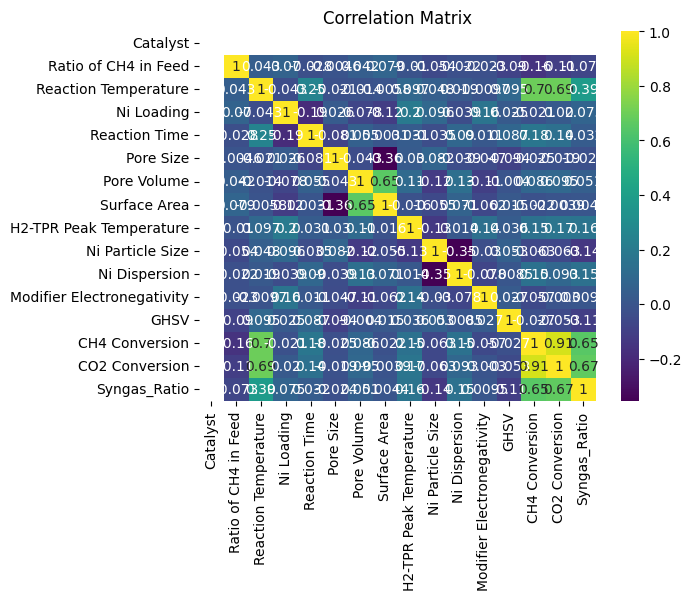

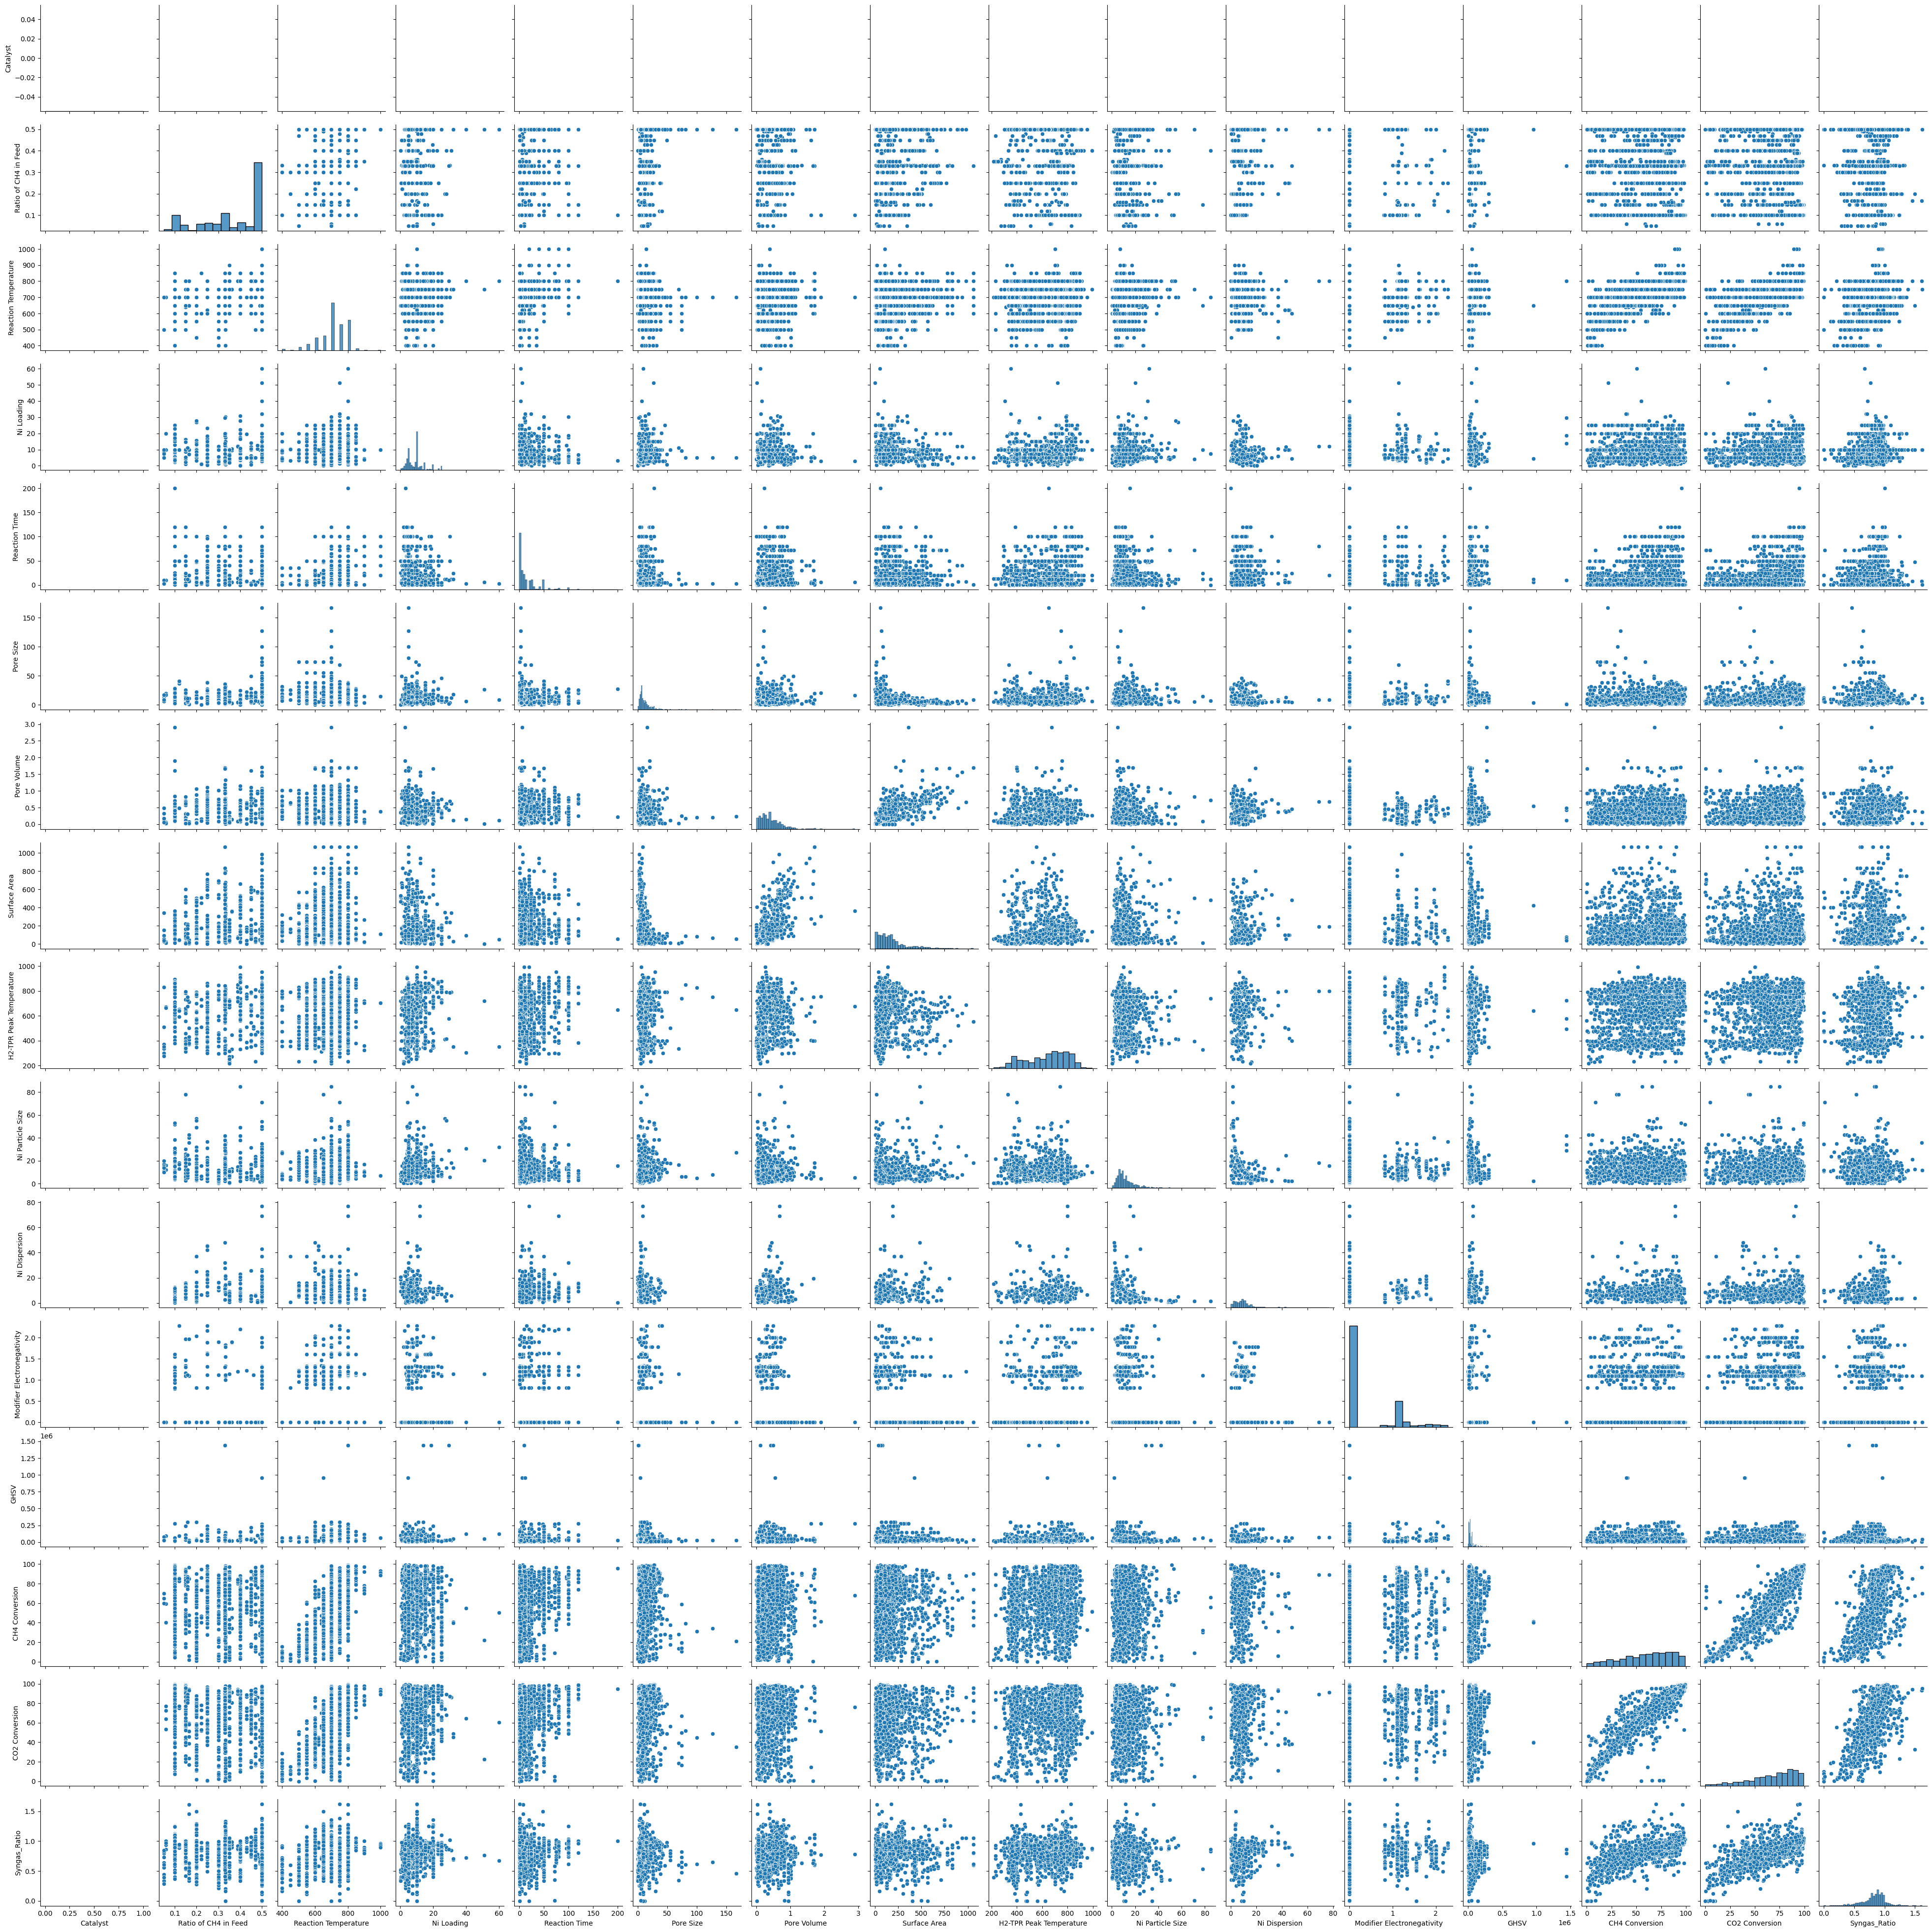

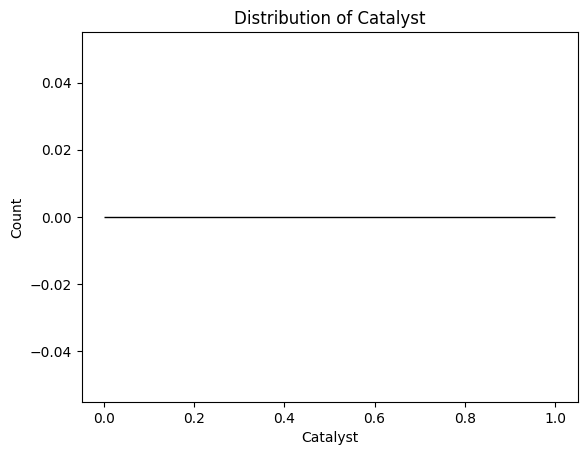

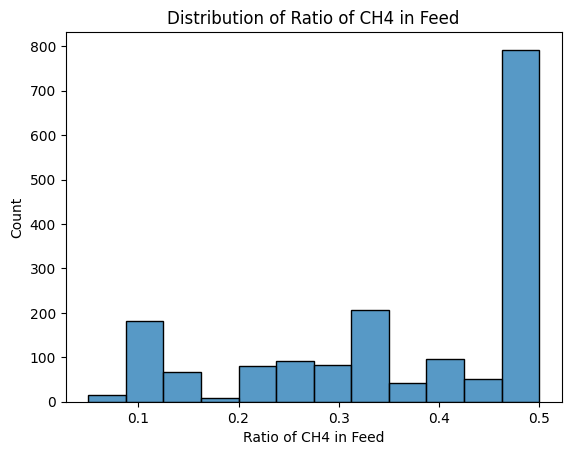

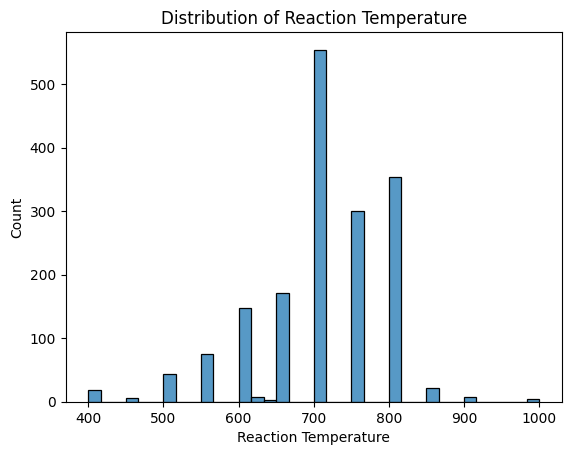

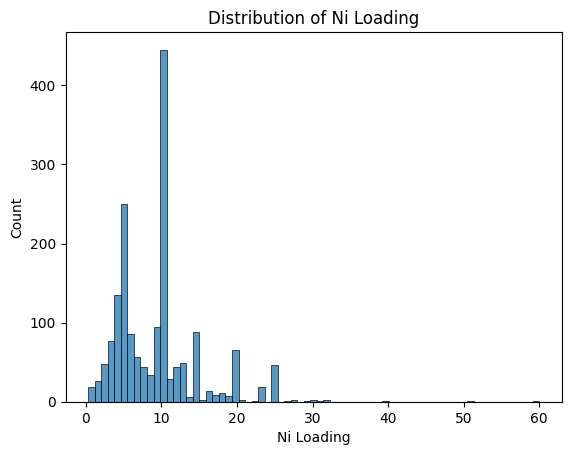

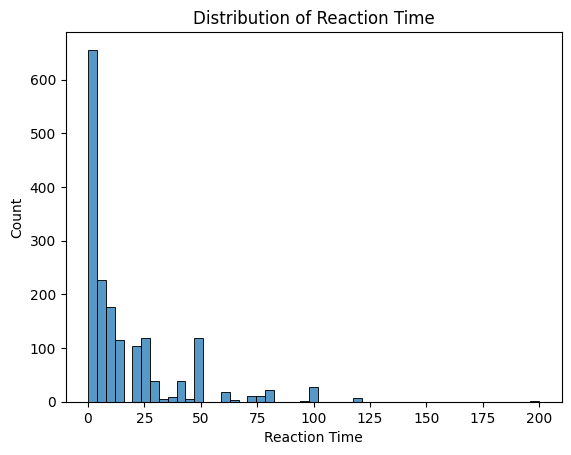

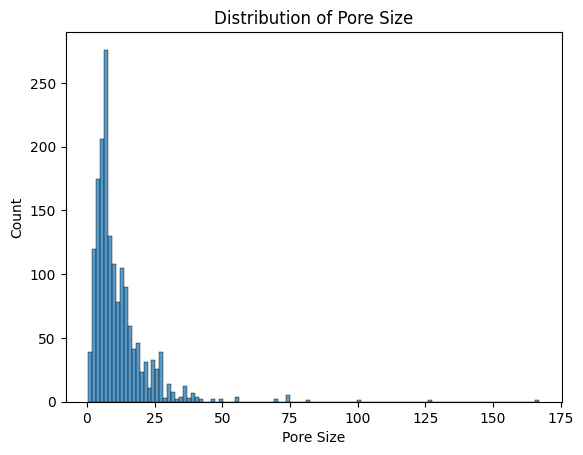

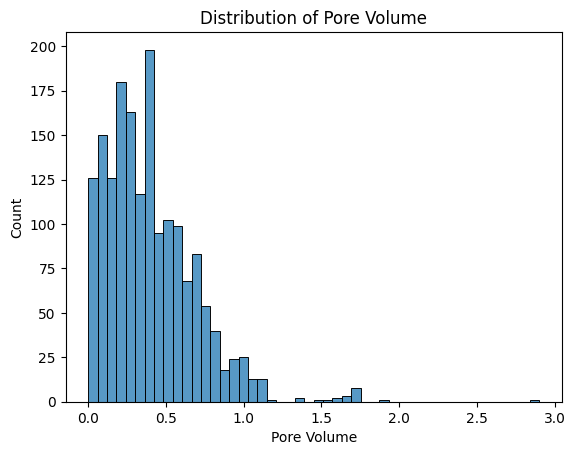

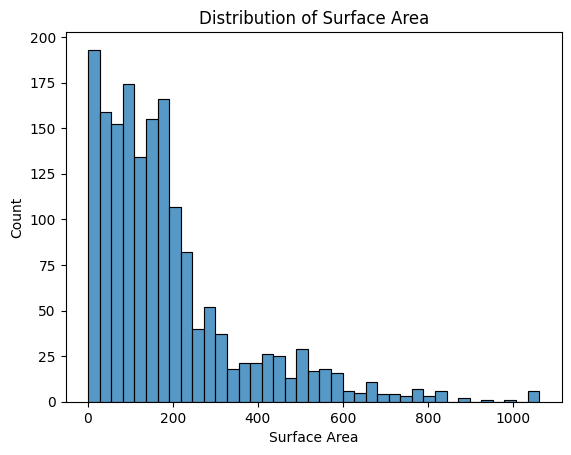

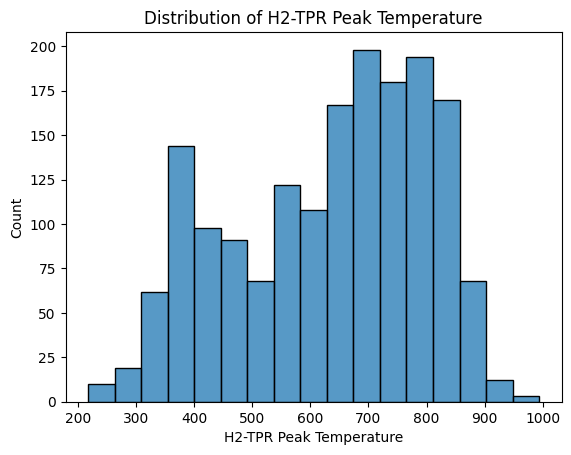

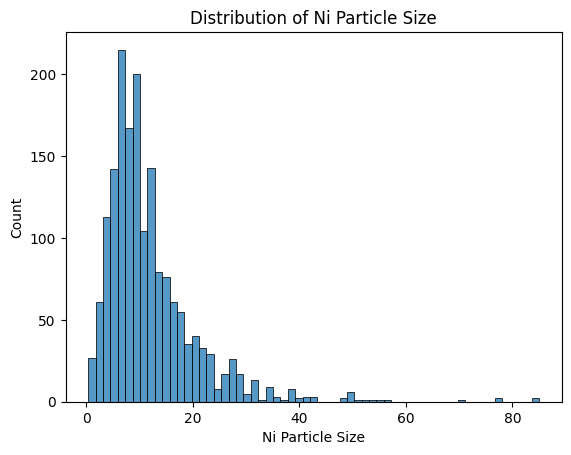

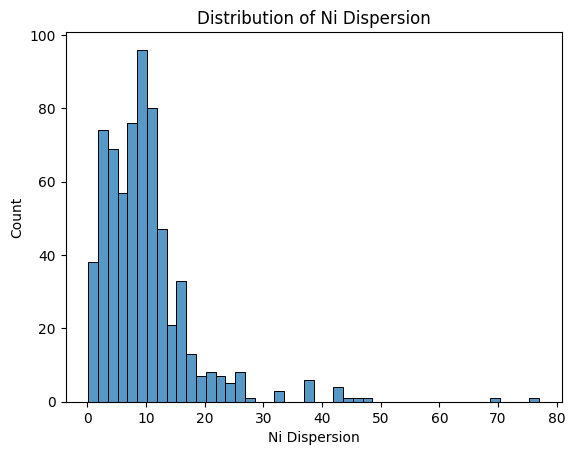

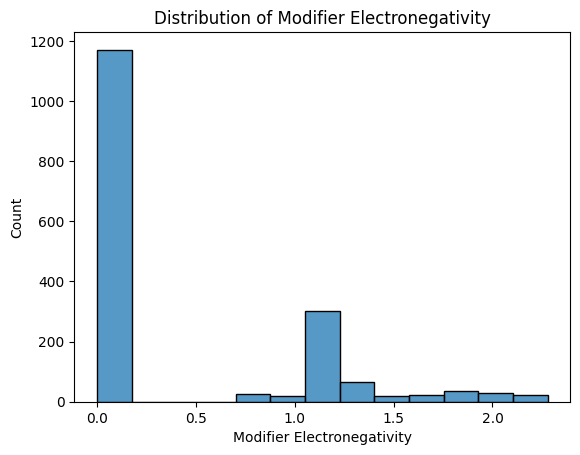

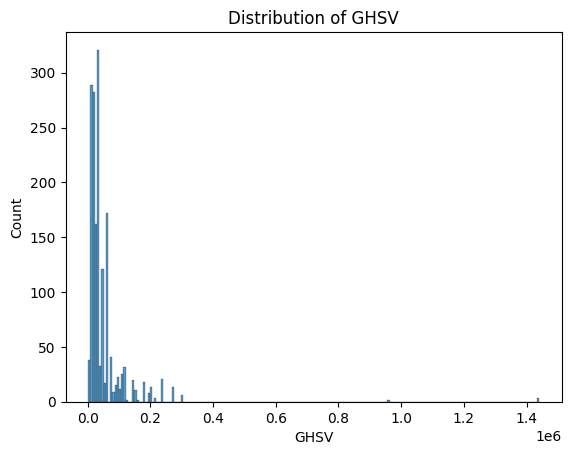

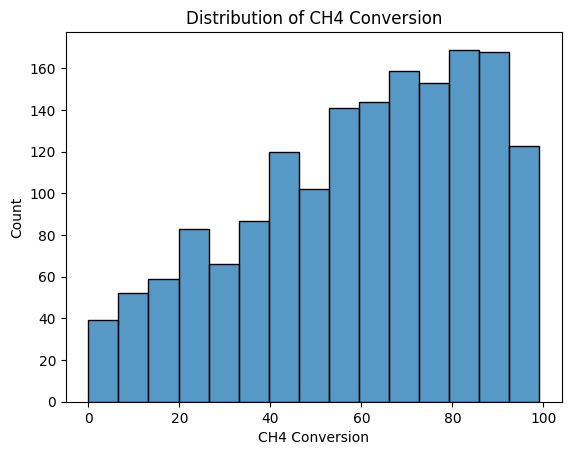

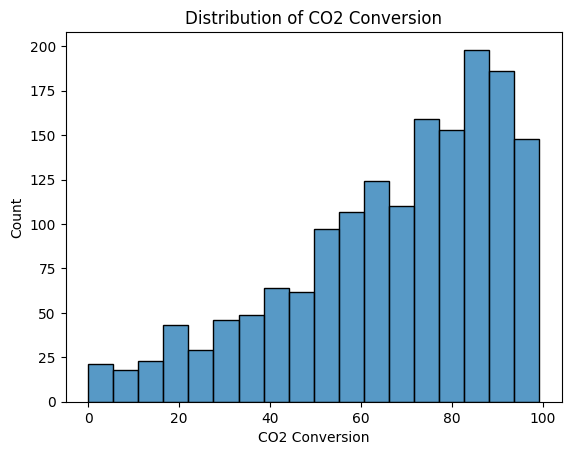

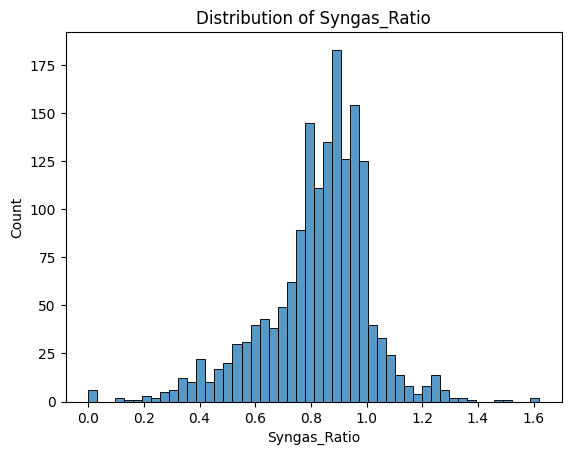

KeyError: 'MSP'

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Use pd.read_excel to read Excel files and specify the encoding
data = pd.read_excel('/content/Test2_dataset.xlsx', engine='openpyxl') # Use openpyxl engine for .xlsx files

# Exploratory Data Analysis (EDA)

# 1. Summary statistics
print(data.describe())

# 2. Correlation analysis
# Convert columns with 'US' to numeric type before calculating correlation
for col in data.columns:
    if data[col].dtype == 'object':  # Check if column is of object type
        try:
            # Attempt to convert to numeric, handling commas and 'US' if present
            data[col] = pd.to_numeric(data[col].str.replace(',', '.').str.replace('US', '', regex=True))  # Added regex=True for consistent replacement
        except:
            print(f"Could not convert column {col} to numeric. This column will be excluded from correlation analysis.")

# Check for any remaining non-numeric values and replace with NaN
data = data.replace('US', '', regex=True).replace('', pd.NA, regex=True) # Added a step to remove any remaining 'US' values

# Convert all columns to numeric type, coercing errors to NaN
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

# 3. Pair plots
sns.pairplot(data)
plt.show()

# 4. Distribution plots
for column in data:
    sns.histplot(data[column])
    plt.title(f'Distribution of {column}')
    plt.show()

# Identify key variables
important_variables = []

# Based on correlation analysis
# Make sure the column name 'MSP' is correct
strong_correlations = correlation_matrix['MSP'][(correlation_matrix['MSP'] > 0.7) | (correlation_matrix['MSP'] < -0.7)]
important_variables.extend(strong_correlations.index)

# Based on feature importance (if using machine learning models)
# ... (add code for feature importance calculation)

# Summarize key insights
print("Key insights:")
print("- **Strong correlations:**", strong_correlations)
print("- **Important variables:**", important_variables)
print("- **Other observations:** (based on EDA results)")